## Train load

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')

In [4]:
train

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
2,0,1,0.02,0,T,Selection,['OrbitalCommand [3080001]']
3,0,1,0.02,0,T,Ability,(1360) - TrainSCV
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"
...,...,...,...,...,...,...,...
67091771,38871,0,8.51,0,Z,Camera,"at (139.578125, 62.58203125)"
67091772,38871,0,8.52,1,T,GetControlGroup,NaN
67091773,38871,0,8.52,0,Z,Camera,"at (122.42578125, 45.4296875)"
67091774,38871,0,8.52,0,Z,Camera,"at (122.42578125, 43.25390625)"


In [19]:
test =pd.read_csv('test.csv')

### train , test 경기당 제공되는 시간 분포

#### train data  time

In [15]:
train_game_time = train['time'].groupby(train['game_id'])

In [16]:
train_game_time=train_game_time.max()

In [150]:
import seaborn as sns

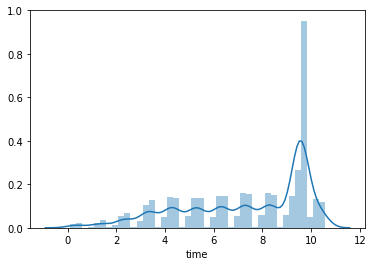

In [18]:
sns.distplot(train_game_time)

#### test data  time

In [20]:
test_game_time = test['time'].groupby(test['game_id'])

In [21]:
test_game_time=test_game_time.max()

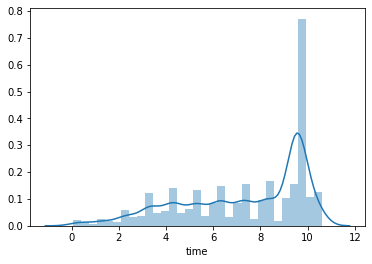

In [22]:
sns.distplot(test_game_time)

### 종족전  data 분리 (T v T ,T v P , T v Z, P v P, P v Z , Z v Z) 후 저장

In [102]:
seperate_data = train[['game_id','player','species']]

In [55]:
seperate_data=seperate_data.drop_duplicates().reset_index(drop=True)

In [61]:
seperate_data

,game_id,player,species
0,0,0,T
1,0,1,T
2,1,1,T
3,1,0,P
4,2,1,Z
...,...,...,...
77739,38869,1,Z
77740,38870,1,P
77741,38870,0,P
77742,38871,1,T


In [72]:
dict_vs={'TT':[],'PT':[],'TZ':[],'PP':[],'PZ':[],'ZZ':[]}

In [59]:
game_id = seperate_data['game_id'].unique()

In [60]:
game_id

array([    0,     1,     2, ..., 38869, 38870, 38871], dtype=int64)

In [87]:
for i in game_id:
    row = seperate_data[seperate_data['game_id']==i]
    vs_list = row['species'].to_list()
    vs_list.sort()
    vs=vs_list[0]+vs_list[1]
    dict_vs[vs].append(i)

In [101]:
for key in dict_vs:
    df = train[train['game_id'].isin(dict_vs[key])]
    df.to_csv(key+'.csv',index=False)
    

### 각 종종전 횟수 및 승률 

In [118]:
seperate_data = train[['game_id','player','species','winner']]

In [119]:
seperate_data=seperate_data.drop_duplicates().reset_index(drop=True)

In [120]:
seperate_data['winner']=seperate_data[seperate_data['winner']==seperate_data['player']]['species']

In [121]:
seperate_data=seperate_data.dropna()

### T vs P 승률

In [124]:
TP_winner=seperate_data[seperate_data['game_id'].isin(dict_vs['PT'])]['winner']

In [129]:
TP_winner.count()

8691

In [135]:
TP=TP_winner.value_counts()

In [139]:
TP['P']/TP_winner.count() *100

50.12081463583017

In [140]:
TP['T']/TP_winner.count() *100

49.87918536416983

### T vs Z 승률

In [141]:
TZ_winner=seperate_data[seperate_data['game_id'].isin(dict_vs['TZ'])]['winner']
TZ=TZ_winner.value_counts()

In [144]:
TZ_winner.count()

10308

In [142]:
TZ['T']/TZ_winner.count() *100

49.3500194024059

In [143]:
TZ['Z']/TZ_winner.count() *100

50.6499805975941

### P vs Z 승률

In [145]:
PZ_winner=seperate_data[seperate_data['game_id'].isin(dict_vs['PZ'])]['winner']
PZ=PZ_winner.value_counts()

In [146]:
PZ_winner.count()

7229

In [147]:
PZ['P']/PZ_winner.count() *100

48.78959745469636

In [148]:
PZ['Z']/PZ_winner.count() *100

51.21040254530364

### 종족전 분포

In [195]:
for_draw = {}
total =0

In [196]:
for key in dict_vs:
    total=total+len(dict_vs[key])
    for_draw[key]=len(dict_vs[key])

In [198]:
for key in for_draw:
    for_draw[key]=for_draw[key]/total

In [185]:
import matplotlib.pyplot as plt

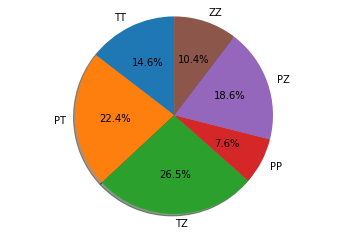

In [211]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = tuple(for_draw.keys())
sizes = list(for_draw.values())


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## T v P EDA

In [215]:
TP_data =pd.read_csv('PT.csv')

In [218]:
terran = TP_data[TP_data['species']=='T']

In [221]:
terran_Ability=terran[terran['event']=='Ability']

In [223]:
terran_Ability['event_contents'].unique()

array(['(1360) - TrainSCV',
       '(1021) - BuildSupplyDepot; Location: (52.0, 27.0, 49094)',
       '(1023) - BuildBarracks; Location: (47.5, 26.5, 49105)', ...,
       '(1025) - BuildMissileTurret; Location: (48.0, 13.0, 49107)',
       '(12A0) - BuildFactoryTechLab; Location: (42.5, 18.5, 49104)',
       '(1025) - BuildMissileTurret; Location: (18.0, 17.0, 49100)'],
      dtype=object)